In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df1 = pd.read_csv("Wholesale customers data.csv")

In [21]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [24]:
df1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [25]:
X_wholesale = df1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
print("Selected features stored in X_wholesale.")

Selected features stored in X_wholesale.


In [26]:
X_wholesale_selected_features = df1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
print("Selected features for analyzing customer buying habits:")
print(X_wholesale_selected_features.head())
print("\nJustification: These features directly represent the quantities or values of different product categories purchased by customers, thus reflecting their buying habits.")

Selected features for analyzing customer buying habits:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

Justification: These features directly represent the quantities or values of different product categories purchased by customers, thus reflecting their buying habits.


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wholesale_selected_features)
print("Data scaled successfully using StandardScaler.")

Data scaled successfully using StandardScaler.


In [28]:
df_scaled = pd.DataFrame(X_scaled, columns=X_wholesale_selected_features.columns)
print("First few rows of scaled data:")
print(df_scaled.head())

First few rows of scaled data:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


In [29]:
from sklearn.cluster import KMeans
wcss_scaled = []
for i in range(1, 11):
  kmeans_scaled = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init='auto')
  kmeans_scaled.fit(X_scaled)
  wcss_scaled.append(kmeans_scaled.inertia_)

print("WCSS values calculated for k from 1 to 10 on scaled data.")

WCSS values calculated for k from 1 to 10 on scaled data.


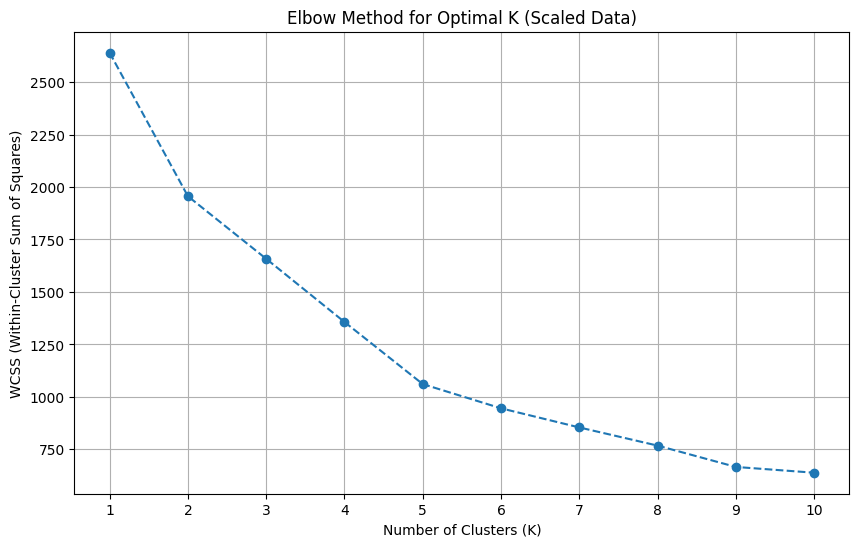

Elbow Method plot displayed to determine the optimal number of clusters.


In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_scaled, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (Scaled Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

print("Elbow Method plot displayed to determine the optimal number of clusters.")

In [31]:
kmeans_scaled = KMeans(n_clusters=3, init='k-means++', random_state=0, n_init='auto')
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

print("K-Means clustering applied to X_scaled with optimal K=3.")
print("First 10 cluster assignments: ", y_kmeans_scaled[:10])

K-Means clustering applied to X_scaled with optimal K=3.
First 10 cluster assignments:  [2 2 2 2 0 2 2 2 2 1]


In [32]:
df1['Cluster'] = y_kmeans_scaled
print("Cluster labels successfully added to the dataset.")
print("\nDataFrame with assigned clusters (first 5 rows):")
display(df1.head())

Cluster labels successfully added to the dataset.

DataFrame with assigned clusters (first 5 rows):


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


In [33]:
print("Mean of features per cluster:")
cluster_means = df1.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
display(cluster_means)

Mean of features per cluster:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,31243.125000,4789.041667,5617.833333,8108.236111,932.319444,2384.347222
1,8935.065217,20126.804348,28248.739130,2867.652174,12771.130435,3345.152174
2,8135.444099,3974.263975,5573.403727,1974.984472,1904.527950,1072.649068


In [34]:
print("Median of features per cluster:")
cluster_medians = df1.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].median()
display(cluster_medians)

Median of features per cluster:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,28891.5,3681.0,4613.0,6221.0,468.5,1577.5
1,5540.5,15607.0,23797.0,1460.5,11908.5,1497.5
2,6997.5,3055.0,3822.0,1194.5,740.0,749.5


In [35]:
print("Standard Deviation of features per cluster:")
cluster_stds = df1.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].std()
display(cluster_stds)

Standard Deviation of features per cluster:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,16878.451177,4635.352205,4481.604428,8694.380235,1176.319850,2647.841120
1,10180.791422,13572.019743,14943.565619,5495.051840,8339.374153,7272.328986
2,6467.468306,3306.297019,4672.129590,2091.983004,2282.161216,1032.526335


/tmp/ipython-input-2620127180.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df1, palette='viridis')


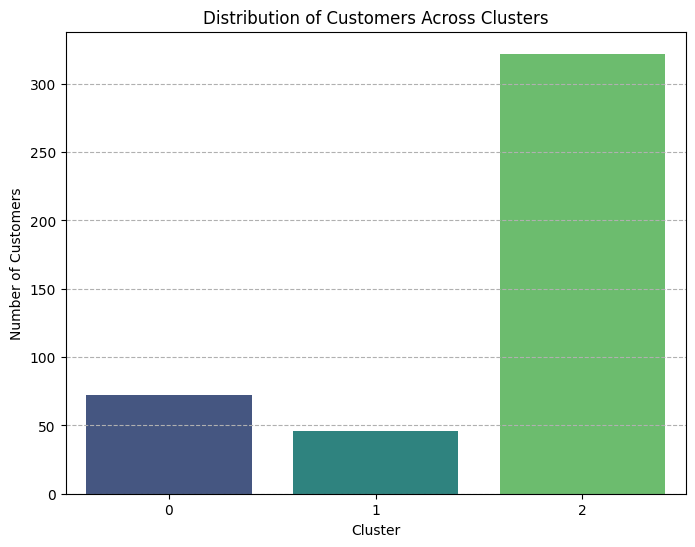

Count plot displayed showing the distribution of customers across the identified clusters.


In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df1, palette='viridis')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

print("Count plot displayed showing the distribution of customers across the identified clusters.")

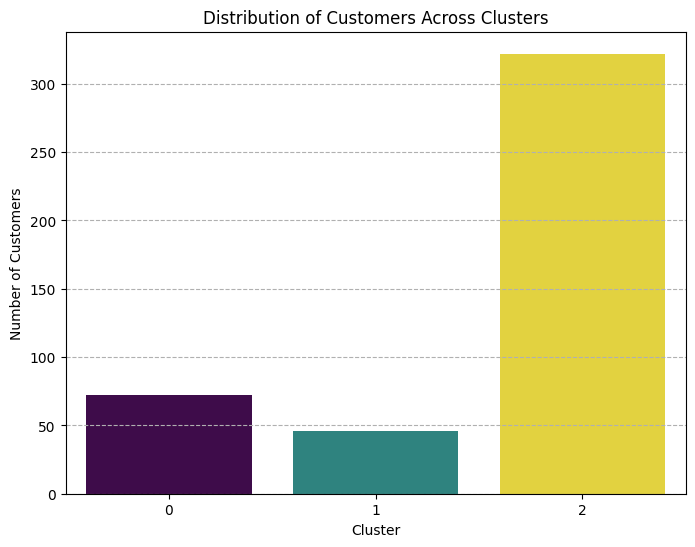

Count plot displayed showing the distribution of customers across the identified clusters.


In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df1, hue='Cluster', palette='viridis', legend=False)
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

print("Count plot displayed showing the distribution of customers across the identified clusters.")

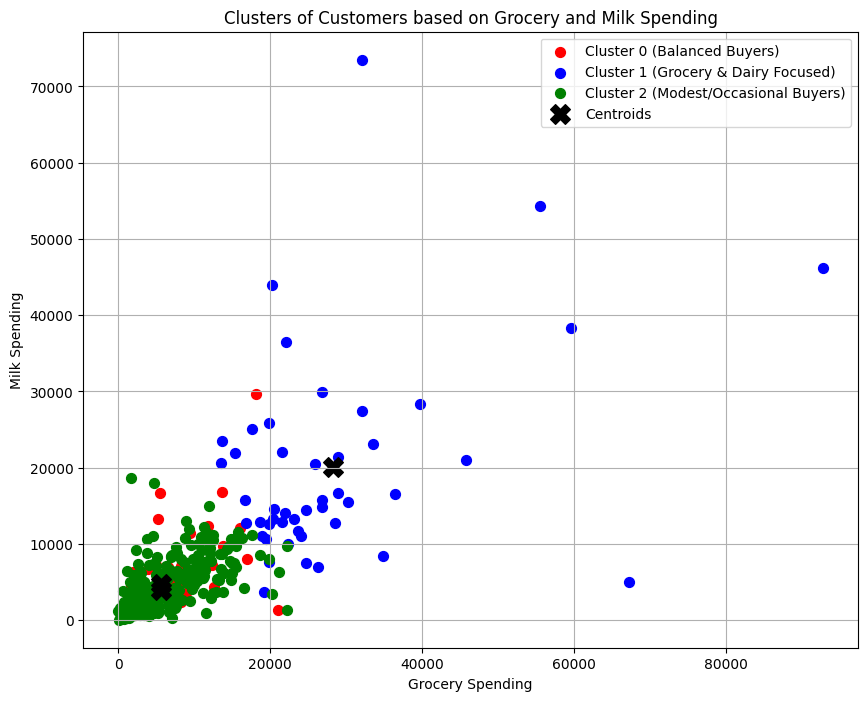

Customer clusters visualized using 'Grocery' and 'Milk' spending, with cluster centers marked.


In [38]:
feature_columns = X_wholesale_selected_features.columns
grocery_index = feature_columns.get_loc('Grocery')
milk_index = feature_columns.get_loc('Milk')
original_scale_centers = scaler.inverse_transform(kmeans_scaled.cluster_centers_)

plt.figure(figsize=(10, 8))
plt.scatter(df1[df1['Cluster'] == 0]['Grocery'], df1[df1['Cluster'] == 0]['Milk'], s = 50, c = 'red', label = 'Cluster 0 (Balanced Buyers)')
plt.scatter(df1[df1['Cluster'] == 1]['Grocery'], df1[df1['Cluster'] == 1]['Milk'], s = 50, c = 'blue', label = 'Cluster 1 (Grocery & Dairy Focused)')
plt.scatter(df1[df1['Cluster'] == 2]['Grocery'], df1[df1['Cluster'] == 2]['Milk'], s = 50, c = 'green', label = 'Cluster 2 (Modest/Occasional Buyers)')

plt.scatter(original_scale_centers[:, grocery_index], original_scale_centers[:, milk_index], s = 200, c = 'black', marker = 'X', label = 'Centroids')

plt.title('Clusters of Customers based on Grocery and Milk Spending')
plt.xlabel('Grocery Spending')
plt.ylabel('Milk Spending')
plt.legend()
plt.grid(True)
plt.show()

print("Customer clusters visualized using 'Grocery' and 'Milk' spending, with cluster centers marked.")